<a href="https://colab.research.google.com/github/dhanvi1911/DS-Lab-Mini-Project-Diabetes-Prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ||About the dataset||

The dataset contains.....

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

# ||Goal--||

  We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?
  

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes2.csv to diabetes2.csv


In [ ]:
#Reading the dataset
df=pd.read_csv('diabetes2.csv')

In [ ]:
#Check the first five values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Checking the null values..
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Checking the meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Doing some basic statistic
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Checking the unique values of dependent variable(outcome)
df["Outcome"].unique()

array([1, 0])

In [ ]:
#Check the dimensions
df.shape

(768, 9)

## Heatmap depicts values for a main variable of interest across 2 axis as a grid of coloured squares.

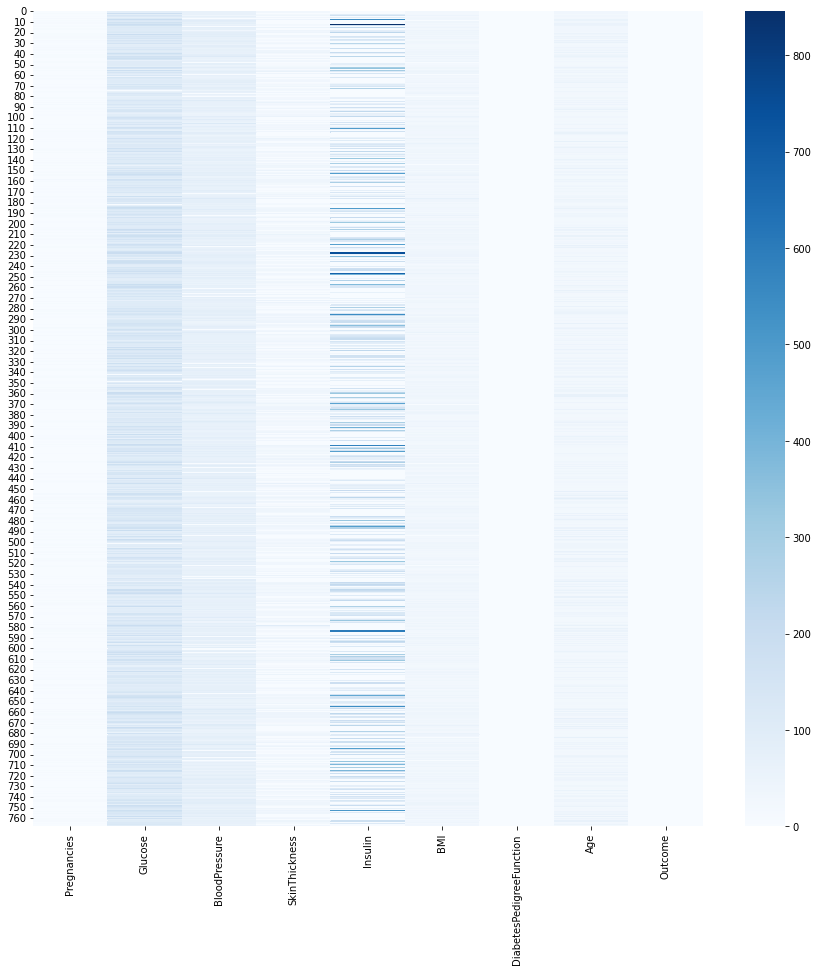

In [ ]:
#Ploting the heatmap to check the correlation between all variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df,cmap="Blues")

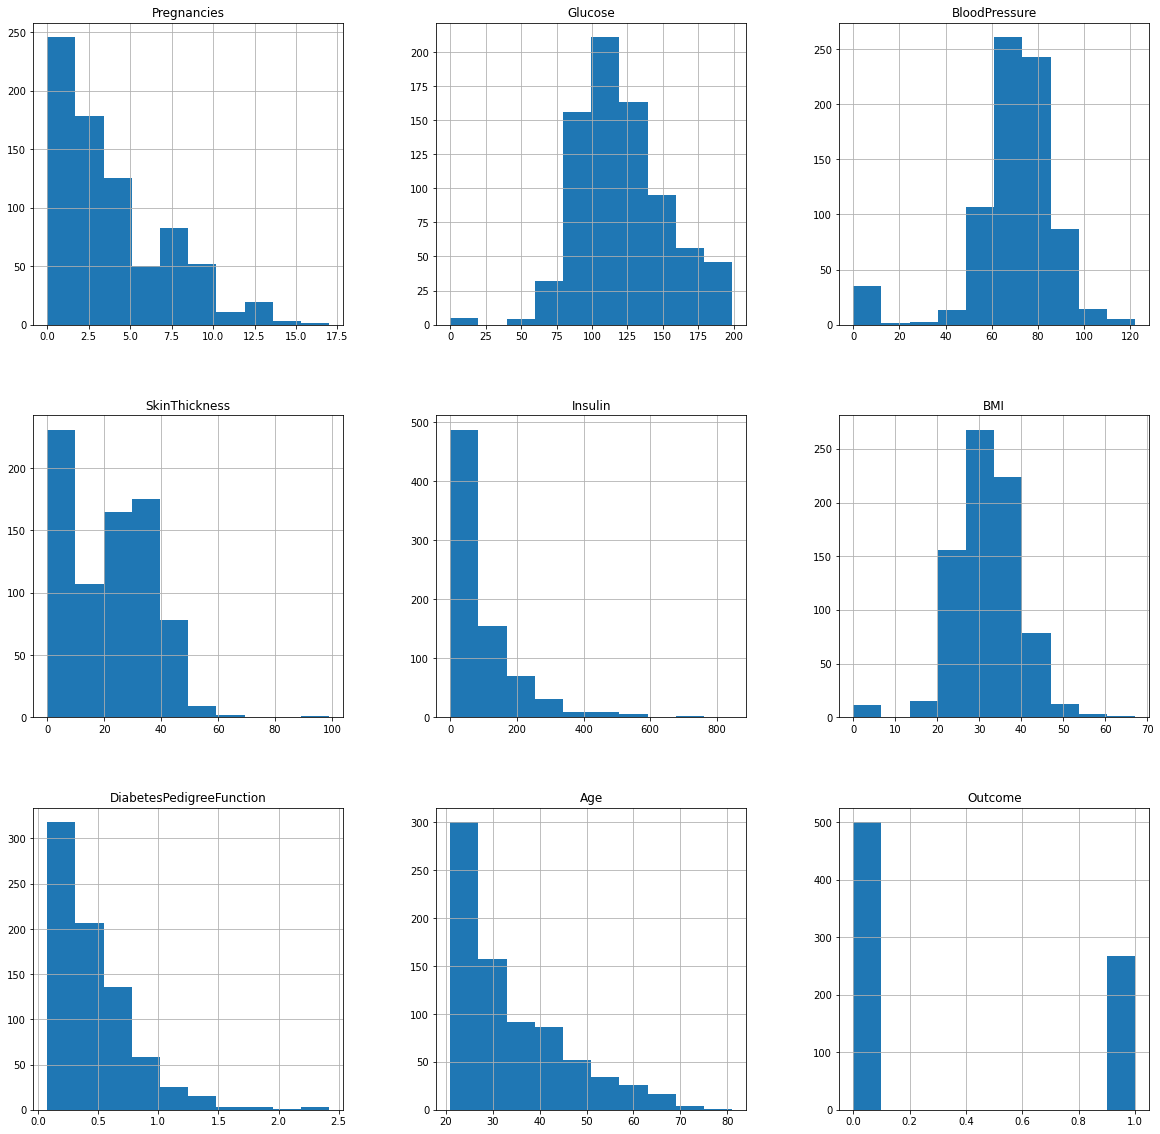

In [ ]:
#Ploting the histogram to check the distribution of each  columns 
p = df.hist(figsize = (20,20))

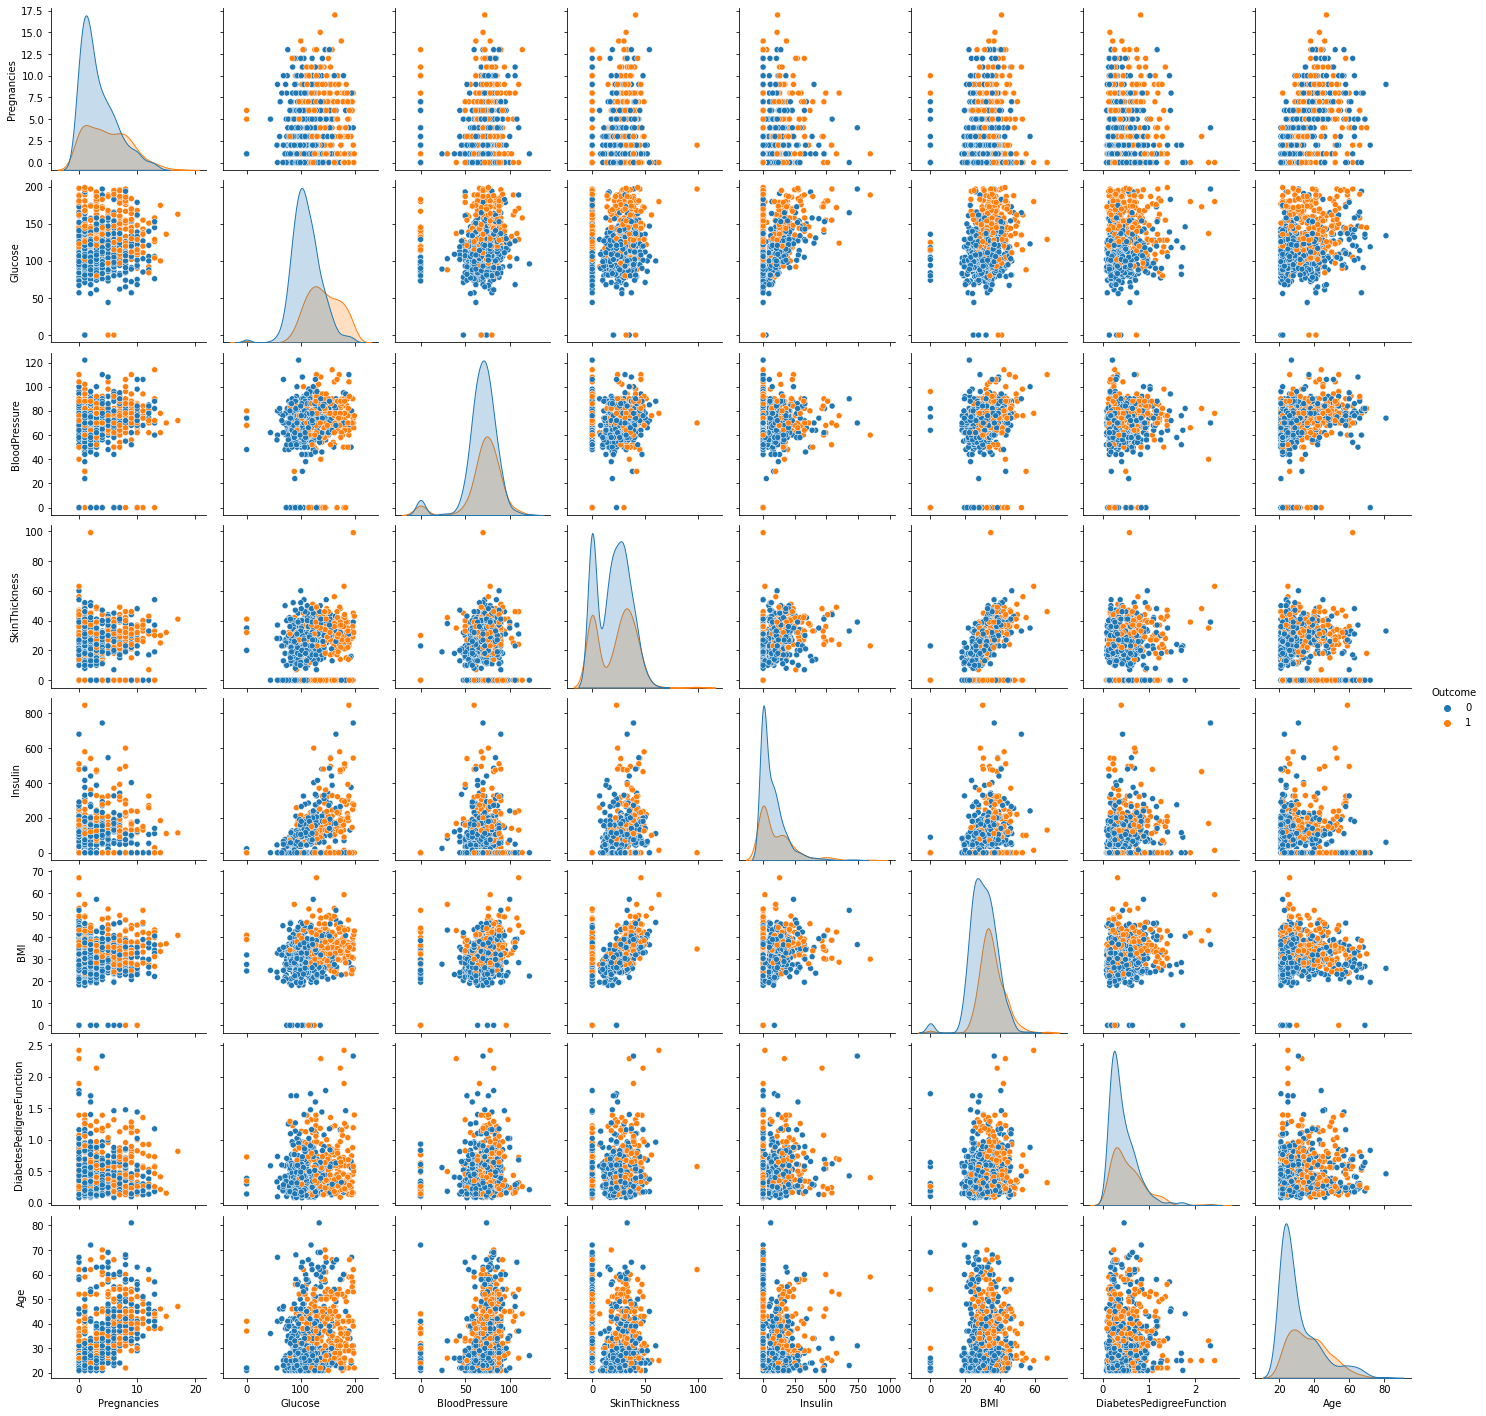

In [ ]:
#Pairplot to visualize the correlation with one variable and all other variables respectively.
p=sns.pairplot(df, hue = 'Outcome')

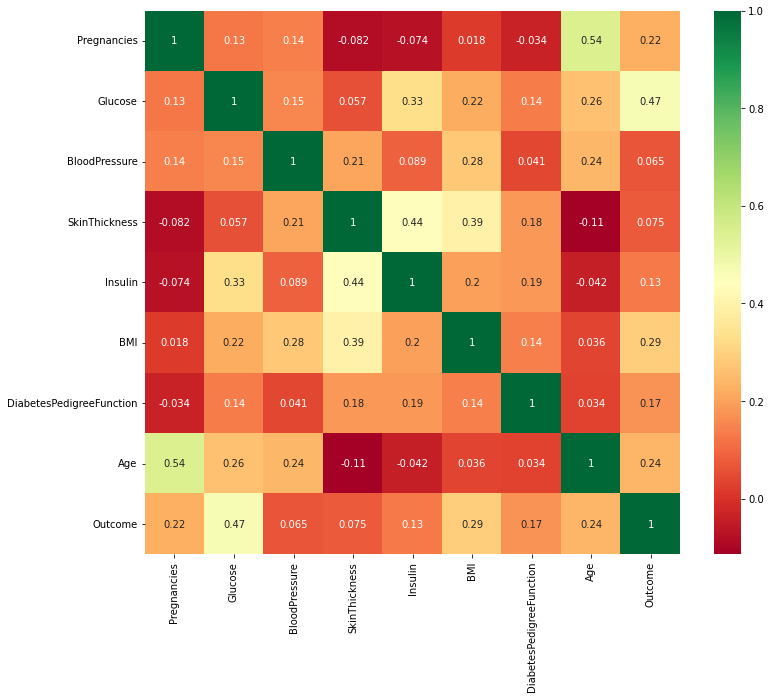

In [ ]:
#Checking the correlation using heatmap
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

In [ ]:
#To scale all independent variable in one go
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:

#Separating dataset into independent and dependent variables
X = df.iloc[:, 0:8].values
y = df.iloc[:, -1].values

In [ ]:
#Splitting into training and testing dataset....
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [ ]:
#Fitting Decisiontree into dataset
from sklearn.tree import DecisionTreeClassifier
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix
#Check the accuracy
from sklearn.metrics import accuracy_score


dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
print("The accuracy of DecisionTreeClassifier is:",accuracy_score(dtree_pred,y_test))

The accuracy of DecisionTreeClassifier is: 0.7229437229437229


In [ ]:
print(dtree_cm)

[[123  34]
 [ 30  44]]


In [ ]:
#Fitting Randomforest into dataset
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,y_test))


The accuracy of RandomForestClassifier is: 0.7316017316017316


In [ ]:
print(rdf_cm)

[[135  22]
 [ 40  34]]


In [ ]:
#Fitting Logistic regression into dataset
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
print("The accuracy of  LogisticRegression is:",accuracy_score(y_test, lr_pred))


The accuracy of  LogisticRegression is: 0.7792207792207793


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(lr_cm)

[[141  16]
 [ 35  39]]


In [ ]:
#Fitting KNN into dataset
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
print("The accuracy of KNeighborsClassifier is:",accuracy_score(knn_pred,y_test))




The accuracy of KNeighborsClassifier is: 0.7142857142857143


In [ ]:
print(knn_cm)

[[143  14]
 [ 52  22]]


In [ ]:
#Fitting Naive bayes into dataset
from sklearn.naive_bayes import GaussianNB



gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
print("The accuracy of naives bayes is:",accuracy_score(bayes_pred,y_test))



The accuracy of naives bayes is: 0.7619047619047619


In [ ]:
print(bayes_cm)

[[138  19]
 [ 36  38]]


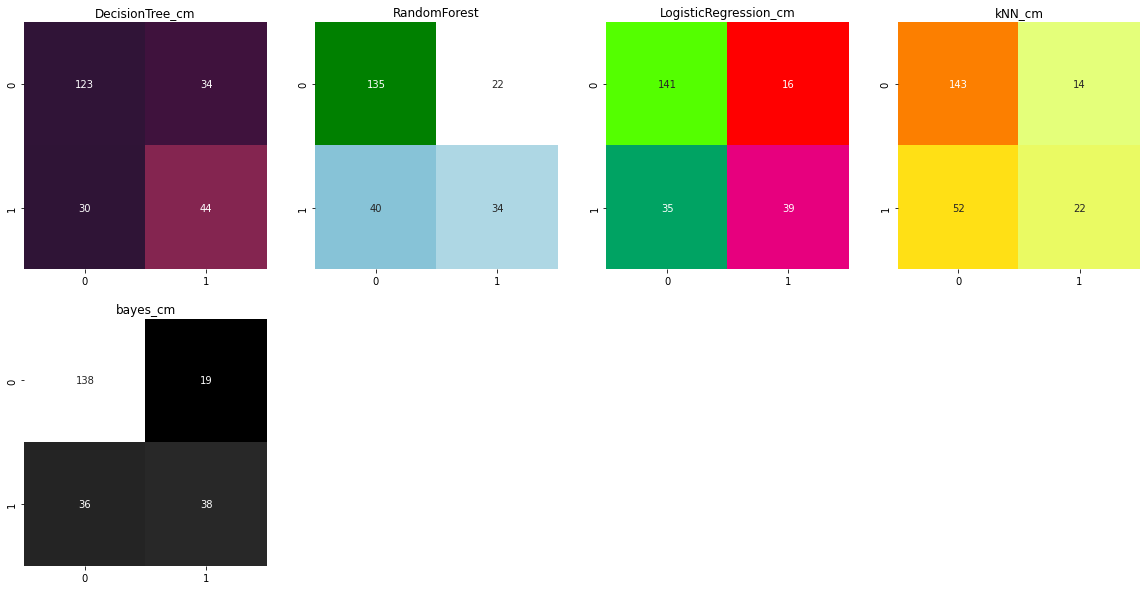

In [ ]:


#confusion matrix.....
plt.figure(figsize=(20,10))
plt.subplot(2,4,3)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="prism",fmt="d",cbar=False)

plt.subplot(2,4,5)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="binary_r",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="ocean_r",fmt="d",cbar=False)

plt.subplot(2,4,1)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="twilight_shifted_r",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Wistia",fmt="d",cbar=False)
plt.show()


# ||Conclusion||

From the above model we can conclude that Logistic regression is the best fit model for diabetes dataset.